## Libs

In [1]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay,
                             classification_report)

from sklearn.preprocessing import MinMaxScaler

## Data

In [2]:
data = pd.read_csv("patients_diabetes_data.csv")

## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   id                                           129 non-null    int64  
 1   gender                                       129 non-null    object 
 2   dead                                         129 non-null    int64  
 3   religion                                     128 non-null    object 
 4   ethnicity                                    129 non-null    object 
 5   insurance                                    129 non-null    object 
 6   number_of_emergency_stays                    129 non-null    int64  
 7   number_of_elective_stays                     129 non-null    int64  
 8   number_of_urgent_stays                       129 non-null    int64  
 9   A1c_hemoglobin_%_mean                        21 non-null     float64
 10  cr

In [4]:
data.describe()

,id,dead,number_of_emergency_stays,number_of_elective_stays,number_of_urgent_stays,A1c_hemoglobin_%_mean,creatinine_mg/dL_mean,glucose_mg/dL_mean,A1c_absolute_mean,number_of_abnormal_results_A1c_hemoglobin_%,number_of_abnormal_results_creatinine,number_of_abnormal_results_glucose,number_of_abnormal_results_A1c_absolute,number_of_A1c_hemoglobin_%_tests,number_of_creatinine_tests,number_of_glucose_tests,number_of_A1c_absolute_tests,diabetes
count,129.000000,129.0,129.000000,129.000000,129.000000,21.000000,128.000000,129.000000,0.0,21.000000,129.000000,129.000000,3.0,21.000000,129.000000,129.000000,3.000000,129.000000
mean,28010.410853,1.0,2.798450,0.077519,0.015504,6.235714,1.374484,140.182349,NaN,0.571429,19.209302,27.263566,0.0,1.333333,38.410853,37.573643,1.333333,0.379845
std,16048.502883,0.0,4.479781,0.268456,0.124027,1.320903,1.308696,39.312695,NaN,0.746420,29.938916,38.162178,0.0,0.483046,49.507041,49.135459,0.577350,0.487240
min,10006.000000,1.0,0.000000,0.000000,0.000000,4.900000,0.367000,78.364000,NaN,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.000000
25%,10088.000000,1.0,1.000000,0.000000,0.000000,5.400000,0.660000,112.323000,NaN,0.000000,0.000000,4.000000,0.0,1.000000,8.000000,7.000000,1.000000,0.000000
50%,40310.000000,1.0,1.000000,0.000000,0.000000,5.800000,0.965500,134.692000,NaN,0.000000,5.000000,11.000000,0.0,1.000000,18.000000,17.000000,1.000000,0.000000
75%,42135.000000,1.0,2.000000,0.000000,0.000000,6.550000,1.312500,158.572000,NaN,1.000000,20.000000,22.000000,0.0,2.000000,35.000000,35.000000,1.500000,1.000000
max,44228.000000,1.0,15.000000,1.000000,1.000000,10.100000,10.083000,344.000000,NaN,2.000000,125.000000,138.000000,0.0,2.000000,171.000000,167.000000,2.000000,1.000000


## Data cleaning

In [5]:
data.columns

Index(['id', 'gender', 'dead', 'religion', 'ethnicity', 'insurance',
       'number_of_emergency_stays', 'number_of_elective_stays',
       'number_of_urgent_stays', 'A1c_hemoglobin_%_mean',
       'creatinine_mg/dL_mean', 'glucose_mg/dL_mean', 'A1c_absolute_mean',
       'number_of_abnormal_results_A1c_hemoglobin_%',
       'number_of_abnormal_results_creatinine',
       'number_of_abnormal_results_glucose',
       'number_of_abnormal_results_A1c_absolute',
       'number_of_A1c_hemoglobin_%_tests', 'number_of_creatinine_tests',
       'number_of_glucose_tests', 'number_of_A1c_absolute_tests', 'diabetes'],
      dtype='object')

In [6]:
# df = data[['gender', 'dead', 'religion', 'ethnicity', 'insurance', 'number_of_emergency_stays', 'number_of_elective_stays', 'number_of_urgent_stays', 'creatinine_mg/dL_mean', 'glucose_mg/dL_mean', 'number_of_abnormal_results_creatinine', 'number_of_abnormal_results_glucose', 'diabetes']]
df = data[['gender', 'dead', 'religion', 'ethnicity', 'insurance', 'number_of_emergency_stays', 'number_of_elective_stays', 'number_of_urgent_stays', 'creatinine_mg/dL_mean', 'glucose_mg/dL_mean', 'diabetes']].copy()

In [7]:
df.head()

,gender,dead,religion,ethnicity,insurance,number_of_emergency_stays,number_of_elective_stays,number_of_urgent_stays,creatinine_mg/dL_mean,glucose_mg/dL_mean,diabetes
0,F,1,CATHOLIC,BLACK/AFRICAN AMERICAN,Medicare,1,0,0,5.418,126.820,1
1,F,1,CATHOLIC,UNKNOWN/NOT SPECIFIED,Private,1,0,0,0.563,115.526,0
2,F,1,CATHOLIC,UNKNOWN/NOT SPECIFIED,Medicare,1,0,0,1.700,149.500,0
3,F,1,CATHOLIC,WHITE,Medicare,1,0,0,0.440,204.800,1
4,M,1,CATHOLIC,WHITE,Medicare,1,0,0,5.800,194.800,0


In [8]:
df.describe()

,dead,number_of_emergency_stays,number_of_elective_stays,number_of_urgent_stays,creatinine_mg/dL_mean,glucose_mg/dL_mean,diabetes
count,129.0,129.000000,129.000000,129.000000,128.000000,129.000000,129.000000
mean,1.0,2.798450,0.077519,0.015504,1.374484,140.182349,0.379845
std,0.0,4.479781,0.268456,0.124027,1.308696,39.312695,0.487240
min,1.0,0.000000,0.000000,0.000000,0.367000,78.364000,0.000000
25%,1.0,1.000000,0.000000,0.000000,0.660000,112.323000,0.000000
50%,1.0,1.000000,0.000000,0.000000,0.965500,134.692000,0.000000
75%,1.0,2.000000,0.000000,0.000000,1.312500,158.572000,1.000000
max,1.0,15.000000,1.000000,1.000000,10.083000,344.000000,1.000000


In [9]:
df['number_of_unplanned_stays'] = df['number_of_emergency_stays'] + df['number_of_urgent_stays']
df = df.rename(columns={"number_of_elective_stays": "number_of_planned_stays"})

In [10]:
df = df.drop(['number_of_emergency_stays', 'number_of_urgent_stays'], axis=1)

In [11]:
df.head()

,gender,dead,religion,ethnicity,insurance,number_of_planned_stays,creatinine_mg/dL_mean,glucose_mg/dL_mean,diabetes,number_of_unplanned_stays
0,F,1,CATHOLIC,BLACK/AFRICAN AMERICAN,Medicare,0,5.418,126.820,1,1
1,F,1,CATHOLIC,UNKNOWN/NOT SPECIFIED,Private,0,0.563,115.526,0,1
2,F,1,CATHOLIC,UNKNOWN/NOT SPECIFIED,Medicare,0,1.700,149.500,0,1
3,F,1,CATHOLIC,WHITE,Medicare,0,0.440,204.800,1,1
4,M,1,CATHOLIC,WHITE,Medicare,0,5.800,194.800,0,1


In [12]:
def encoding(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [13]:
df = encoding(df, 'gender')
df = encoding(df, 'religion')
df = encoding(df, 'ethnicity')
df = encoding(df, 'insurance')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 31 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   dead                                                                129 non-null    int64  
 1   number_of_planned_stays                                             129 non-null    int64  
 2   creatinine_mg/dL_mean                                               128 non-null    float64
 3   glucose_mg/dL_mean                                                  129 non-null    float64
 4   diabetes                                                            129 non-null    int64  
 5   number_of_unplanned_stays                                           129 non-null    int64  
 6   gender_F                                                            129 non-null    uint8  
 7   gender_M         

## Train, test split

In [15]:
df.describe()

,dead,number_of_planned_stays,creatinine_mg/dL_mean,glucose_mg/dL_mean,diabetes,number_of_unplanned_stays,gender_F,gender_M,religion_BUDDHIST,religion_CATHOLIC,...,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_OTHER,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,insurance_Government,insurance_Medicaid,insurance_Medicare,insurance_Private
count,129.0,129.000000,128.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,1.0,0.077519,1.374484,140.182349,0.379845,2.813953,0.457364,0.542636,0.007752,0.457364,...,0.015504,0.116279,0.023256,0.007752,0.085271,0.666667,0.007752,0.046512,0.759690,0.186047
std,0.0,0.268456,1.308696,39.312695,0.487240,4.471730,0.500121,0.500121,0.088045,0.500121,...,0.124027,0.321809,0.151302,0.088045,0.280374,0.473242,0.088045,0.211411,0.428938,0.390661
min,1.0,0.000000,0.367000,78.364000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.660000,112.323000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.0,0.000000,0.965500,134.692000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.0,0.000000,1.312500,158.572000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,1.000000,10.083000,344.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df[df.isnull().any(axis=1)]

,dead,number_of_planned_stays,creatinine_mg/dL_mean,glucose_mg/dL_mean,diabetes,number_of_unplanned_stays,gender_F,gender_M,religion_BUDDHIST,religion_CATHOLIC,...,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_OTHER,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,insurance_Government,insurance_Medicaid,insurance_Medicare,insurance_Private
53,1,0,NaN,134.692,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [17]:
df = df.fillna(df.mean())

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 31 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   dead                                                                129 non-null    int64  
 1   number_of_planned_stays                                             129 non-null    int64  
 2   creatinine_mg/dL_mean                                               129 non-null    float64
 3   glucose_mg/dL_mean                                                  129 non-null    float64
 4   diabetes                                                            129 non-null    int64  
 5   number_of_unplanned_stays                                           129 non-null    int64  
 6   gender_F                                                            129 non-null    uint8  
 7   gender_M         

In [19]:
df = df.reset_index()

In [20]:
x = df.loc[:, (df.columns != 'diabetes') & (df.columns != 'index')]
y = df[['diabetes']]

In [21]:
x.head()

,dead,number_of_planned_stays,creatinine_mg/dL_mean,glucose_mg/dL_mean,number_of_unplanned_stays,gender_F,gender_M,religion_BUDDHIST,religion_CATHOLIC,religion_CHRISTIAN SCIENTIST,...,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_OTHER,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,insurance_Government,insurance_Medicaid,insurance_Medicare,insurance_Private
0,1,0,5.418,126.820,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0.563,115.526,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,1.700,149.500,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,0.440,204.800,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,5.800,194.800,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=13)

In [23]:
x = x.copy()
scaler = MinMaxScaler()
x['creatinine_mg/dL_mean'] = scaler.fit_transform(x['creatinine_mg/dL_mean'].to_numpy().reshape(-1, 1))
x['glucose_mg/dL_mean'] = scaler.fit_transform(x['glucose_mg/dL_mean'].to_numpy().reshape(-1, 1))
x['number_of_unplanned_stays'] = scaler.fit_transform(x['number_of_unplanned_stays'].to_numpy().reshape(-1, 1))
x['number_of_planned_stays'] = scaler.fit_transform(x['number_of_planned_stays'].to_numpy().reshape(-1, 1))


x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x, y,test_size=0.3, random_state=13)

## Modelling

In [24]:
model_params={
    'svm':{
        'model': svm.SVC(gamma='auto', tol=1e-1, cache_size=2000, max_iter=1500),
        'params': {
            # 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'C': [0.001, 0.01, 0.1, 1, 3, 10, 30],
            'kernel': ['linear', 'rbf']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(random_state=15),
        'params': {
            'n_estimators':[2, 5, 10, 13, 18, 20, 30, 40],
            'min_samples_split': [2, 3, 5, 10, 20]
        }
    },
    'logistic_regession':{
        'model': LogisticRegression(random_state=15, solver='liblinear'),
        'params':{
            'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            # 'penalty':['l1','l2','elasticnet']
            'penalty':['l1','l2']
        }
    },
    'decision_tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': np.arange(3, 10),
            'splitter': ['best', 'random'],
            'criterion': ['gini', 'entropy']
        }
        
    }
}

In [25]:
results=[]
models = {}

for model_name, mod_par in model_params.items():
    print(model_name)
    clasifier=GridSearchCV(mod_par['model'],mod_par['params'],cv=5,return_train_score=False)
    
    if(model_name=='svm'): clasifier.fit(x_train_svm, y_train_svm.values.ravel())
    else: clasifier.fit(x_train, y_train.values.ravel())
        
    results.append({
        'model': model_name,
        'best_score': clasifier.best_score_,
        'best_params': clasifier.best_params_
    })
    
    info = model_name + str(clasifier.best_params_)
    models[info] = clasifier

svm
random_forest
logistic_regession
decision_tree


In [26]:
answer=pd.DataFrame(results,columns=['model','best_score','best_params'])
answer

,model,best_score,best_params
0,svm,0.766667,"{'C': 0.1, 'kernel': 'linear'}"
1,random_forest,0.811111,"{'min_samples_split': 2, 'n_estimators': 5}"
2,logistic_regession,0.766667,"{'C': 0.001, 'penalty': 'l2'}"
3,decision_tree,0.777778,"{'criterion': 'gini', 'max_depth': 7, 'splitte..."


In [27]:
results

[{'model': 'svm',
  'best_score': 0.7666666666666667,
  'best_params': {'C': 0.1, 'kernel': 'linear'}},
 {'model': 'random_forest',
  'best_score': 0.8111111111111111,
  'best_params': {'min_samples_split': 2, 'n_estimators': 5}},
 {'model': 'logistic_regession',
  'best_score': 0.7666666666666667,
  'best_params': {'C': 0.001, 'penalty': 'l2'}},
 {'model': 'decision_tree',
  'best_score': 0.7777777777777778,
  'best_params': {'criterion': 'gini', 'max_depth': 7, 'splitter': 'random'}}]

## Predict

In [28]:
models

{"svm{'C': 0.1, 'kernel': 'linear'}": GridSearchCV(cv=5,
              estimator=SVC(cache_size=2000, gamma='auto', max_iter=1500,
                            tol=0.1),
              param_grid={'C': [0.001, 0.01, 0.1, 1, 3, 10, 30],
                          'kernel': ['linear', 'rbf']}),
 "random_forest{'min_samples_split': 2, 'n_estimators': 5}": GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=15),
              param_grid={'min_samples_split': [2, 3, 5, 10, 20],
                          'n_estimators': [2, 5, 10, 13, 18, 20, 30, 40]}),
 "logistic_regession{'C': 0.001, 'penalty': 'l2'}": GridSearchCV(cv=5,
              estimator=LogisticRegression(random_state=15, solver='liblinear'),
              param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                1000],
                          'penalty': ['l1', 'l2']}),
 "decision_tree{'criterion': 'gini', 'max_depth': 7, 'splitter': 'random'}": GridSearchCV(cv=5, estimator=DecisionT

In [29]:
model_names=[]
for key, value in models.items():
    model_names.append(key)
model_names

["svm{'C': 0.1, 'kernel': 'linear'}",
 "random_forest{'min_samples_split': 2, 'n_estimators': 5}",
 "logistic_regession{'C': 0.001, 'penalty': 'l2'}",
 "decision_tree{'criterion': 'gini', 'max_depth': 7, 'splitter': 'random'}"]

In [30]:
y_hat_svm = models[model_names[0]].predict(x_test_svm)
y_hat_random_forest = models[model_names[1]].predict(x_test)
y_hat_logistic_regression = models[model_names[2]].predict(x_test)
y_hat_decision_tree = models[model_names[3]].predict(x_test)

In [31]:
print("SVM: ", y_hat_svm)
print("Random Forest: ", y_hat_random_forest)
print("Logistic Regression: ", y_hat_logistic_regression)
print("Decision Tree: ", y_hat_decision_tree )

SVM:  [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1]
Random Forest:  [1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 1]
Logistic Regression:  [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1]
Decision Tree:  [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0
 0 1]


## Metrics

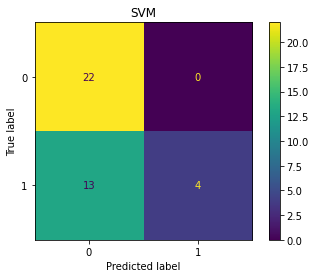

In [32]:
matrix_svm = confusion_matrix(y_test_svm, y_hat_svm)
disp = ConfusionMatrixDisplay(matrix_svm)
disp.plot()
plt.title("SVM");

In [33]:
report = classification_report(y_test, y_hat_svm)
print(report)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        22
           1       1.00      0.24      0.38        17

    accuracy                           0.67        39
   macro avg       0.81      0.62      0.58        39
weighted avg       0.79      0.67      0.60        39



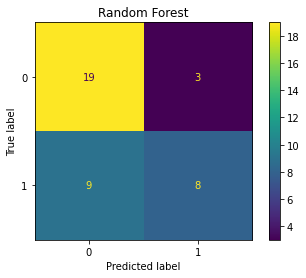

In [34]:
matrix_random_forest = confusion_matrix(y_test, y_hat_random_forest)
disp = ConfusionMatrixDisplay(matrix_random_forest)
disp.plot()
plt.title("Random Forest");

In [35]:
report = classification_report(y_test, y_hat_random_forest)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        22
           1       0.73      0.47      0.57        17

    accuracy                           0.69        39
   macro avg       0.70      0.67      0.67        39
weighted avg       0.70      0.69      0.68        39



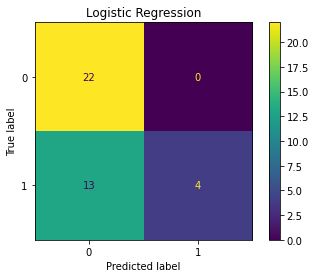

In [36]:
matrix_logistic_regression = confusion_matrix(y_test, y_hat_logistic_regression)
disp = ConfusionMatrixDisplay(matrix_logistic_regression)
disp.plot()
plt.title("Logistic Regression");

In [37]:
report = classification_report(y_test, y_hat_logistic_regression)
print(report)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        22
           1       1.00      0.24      0.38        17

    accuracy                           0.67        39
   macro avg       0.81      0.62      0.58        39
weighted avg       0.79      0.67      0.60        39



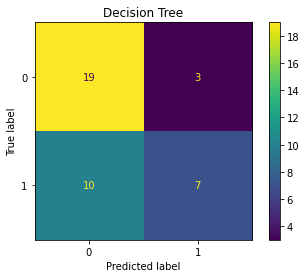

In [38]:
matrix_decision_tree = confusion_matrix(y_test, y_hat_decision_tree)
disp = ConfusionMatrixDisplay(matrix_decision_tree)
disp.plot()
plt.title("Decision Tree");

In [39]:
report = classification_report(y_test, y_hat_decision_tree)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.86      0.75        22
           1       0.70      0.41      0.52        17

    accuracy                           0.67        39
   macro avg       0.68      0.64      0.63        39
weighted avg       0.67      0.67      0.65        39

